### ML Assignment 2: K-Means and Hierarichal Clustering with elbow method

### 1. Importing Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

### 2. Reading and Understanding the dataset

In [66]:
df = pd.read_csv('sales_data_sample.csv', sep=",", encoding='Latin-1')

In [67]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [68]:
df.shape

(2823, 25)

In [69]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


### 3. Handling Missing Values


In [71]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [72]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATUS','POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'COUNTRY', 'ORDERDATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER', 'PRODUCTCODE']
df = df.drop(df_drop, axis=1) 

In [73]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
DEALSIZE           0
dtype: int64

In [74]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,Small
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,Small
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,Medium
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,Medium
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,Medium
...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,4,12,2004,Ships,54,Small
2819,29,100.00,1,3978.51,1,1,2005,Ships,54,Medium
2820,43,100.00,4,5417.57,1,3,2005,Ships,54,Medium
2821,34,62.24,1,2116.16,1,3,2005,Ships,54,Small


In [75]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [76]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [77]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['PRODUCTLINE', 'DEALSIZE']])
enc.categories_

[array(['Classic Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains',
        'Trucks and Buses', 'Vintage Cars'], dtype=object),
 array(['Large', 'Medium', 'Small'], dtype=object)]

In [78]:
one_hot = enc.transform(df[['PRODUCTLINE', 'DEALSIZE']]).toarray()
one_hot

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [79]:
df[['Classic Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains', 'Trucks and Buses', 'Vintage Cars', 'Large', 'Medium', 'Small']] = one_hot

In [80]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,DEALSIZE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,Small,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,Small,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,Medium,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,Medium,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,Medium,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
df_drop  = ['PRODUCTLINE', 'DEALSIZE']
df = df.drop(df_drop, axis=1) 

In [82]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,1,2,2003,95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,34,81.35,5,2765.90,2,5,2003,95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,94.74,2,3884.34,3,7,2003,95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,45,83.26,6,3746.70,3,8,2003,95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,49,100.00,14,5205.27,4,10,2003,95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 4. Finding Clusters using the Elbow Method 

In [84]:
from sklearn.cluster import KMeans, k_means

distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters = k)
    model.fit(df)
    distortions.append(model.inertia_)

C:\Users\aseem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


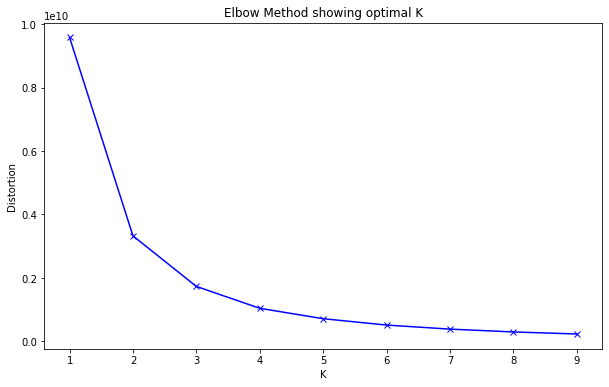

In [85]:
plt.figure(figsize =(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Method showing optimal K')
plt.show()

### 5. Implementing Kmeans for optimal clusters 

In [94]:
X_train = df.values
X_train

array([[ 30.  ,  95.7 ,   2.  , ...,   0.  ,   0.  ,   1.  ],
       [ 34.  ,  81.35,   5.  , ...,   0.  ,   0.  ,   1.  ],
       [ 41.  ,  94.74,   2.  , ...,   0.  ,   1.  ,   0.  ],
       ...,
       [ 43.  , 100.  ,   4.  , ...,   0.  ,   1.  ,   0.  ],
       [ 34.  ,  62.24,   1.  , ...,   0.  ,   0.  ,   1.  ],
       [ 47.  ,  65.52,   9.  , ...,   0.  ,   1.  ,   0.  ]])

In [95]:
#from sklearn.preprocessing import StandardScaler
#
#std = StandardScaler()
#X_train = std.fit_transform(X_train)

In [97]:
model = KMeans(n_clusters=3, random_state=2)
model.fit(X_train)
predictions = model.predict(X_train)
predictions

array([1, 1, 0, ..., 0, 1, 1])

In [100]:
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,3)
counts_df = pd.DataFrame(counts, columns=['Cluster1', 'Cluster2', 'Cluster3'])
counts_df

,Cluster1,Cluster2,Cluster3
0,1083,1367,373


In [101]:
labels = model.labels_
sales_of_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)
sales_of_cluster.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,1,2,2003,95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,34,81.35,5,2765.90,2,5,2003,95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,41,94.74,2,3884.34,3,7,2003,95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,45,83.26,6,3746.70,3,8,2003,95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,49,100.00,14,5205.27,4,10,2003,95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
